<a href="https://colab.research.google.com/github/sjkchang/CMPE255-Assignment-2/blob/master/notebooks/Assignment_2_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret


In [20]:
# check installed version
import pycaret
import pandas as pd
pycaret.__version__

'3.0.4'

In [6]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
 3D-Print-Anomoly-Detection/
 Amazon-stock-time-series.csv
 CarPrice_Assignment.csv
'Credit Card Customer Data - Clustering.csv'
 falling-elders-anomoly-detection/
 flagged/
 Groceries_dataset-association-rules-mining.csv
 heartattack.csv
 logs.log
 my_first_pipeline.pkl
 secondhand-car-price-regression.csv


In [15]:
### loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('Amazon-stock-time-series')

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


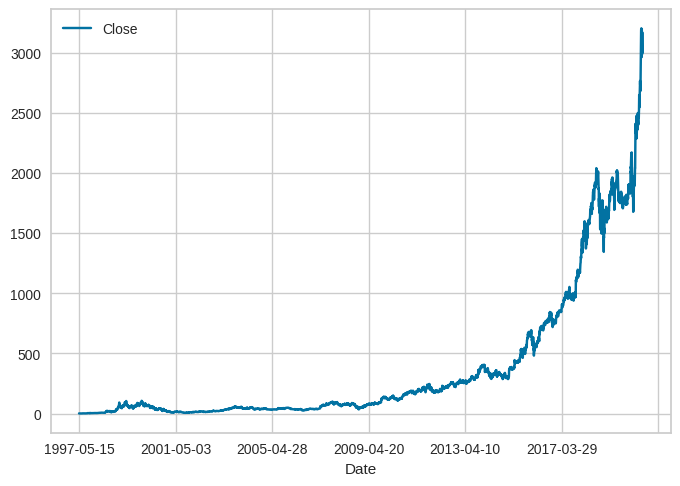

In [16]:
data.plot(x= 'Date', y= 'Close')
data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace=True)


Dates must be converted to datetime to work with pycarets time series module


In [21]:
data['Date'] = pd.to_datetime(data['Date'])

In [22]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, target='Close', fh=3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(5842, 2)"
5,Transformed data shape,"(5842, 2)"
6,Transformed train set shape,"(5839, 2)"
7,Transformed test set shape,"(3, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [23]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,4.0359,2.0937,79.3789,97.4364,0.0258,0.0257,-1.9551,1.8000
croston,Croston,4.9286,2.5013,96.8470,116.2826,0.0312,0.0320,-2.4313,0.0467
stlf,STLF,6.8672,3.2134,134.9284,149.4081,0.0439,0.0448,-9.3866,0.1600
snaive,Seasonal Naive Forecaster,8.7354,4.1149,171.6144,191.3343,0.0560,0.0576,-14.9908,0.1200
grand_means,Grand Means Forecaster,136.2582,57.5828,2681.1640,2682.1135,0.8791,1.5685,-4848.5828,0.0500


Processing:   0%|          | 0/101 [00:00<?, ?it/s]

In [24]:


# plot forecast
plot_model(best, plot = 'forecast')

In [30]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,4.1917,2.1595,83.0332,101.2760,0.0266,0.0271,-2.0505


In [31]:
# show predictions df
holdout_pred.head()

,y_pred
5839,3000.3301
5840,3000.3301
5841,3000.3301
